<a href="https://colab.research.google.com/github/ViktoriaAve/Python_model_training/blob/main/Python_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
advertising = pd.read_csv('/content/tvmarketing.csv')

In [ ]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
advertising.describe()
# Column TV - advertising budget spent on TV marketing
# Sales - how much we sold (revenue)

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [ ]:
# Regression plot
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

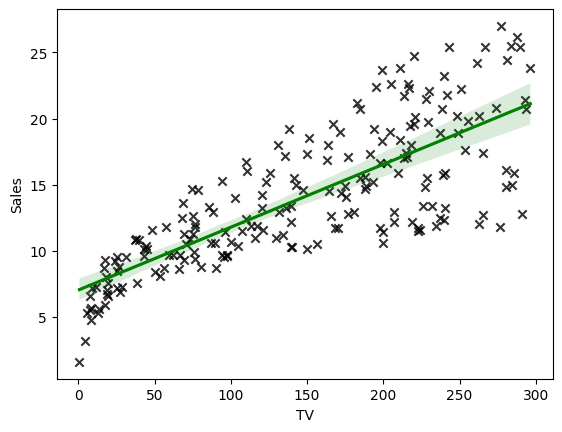

In [ ]:
    sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))


In [ ]:
# Pearson correlation  koefficient

advertising.corr() #calculate corr for the whole dataframe

### correlation = df['Column1'].corr(df['Column2'])

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [ ]:
advertising['TV'].corr(advertising['Sales']) ###0.78 possitve, strong

0.7822244248616061

In [ ]:
### Supervised vs unsupervised
# https://scikit-learn.org/stable/
![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

## Training linear regression model

# preparing X and Y

X = advertising.drop('Sales', axis=1)
X.head()

/bin/bash: -c: line 1: syntax error near unexpected token `https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png'
/bin/bash: -c: line 1: `[jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)'


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
Y = advertising.drop('TV', axis=1)
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
# Train/Test sets

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

In [ ]:
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [ ]:
# COLUMN - feature
# ROW - observation



In [ ]:
# Train the model

from sklearn.linear_model import LinearRegression # import the model

In [ ]:
model = LinearRegression() #Initialize the model

In [ ]:
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [ ]:
### Y = mX + b

print(f'Model intercept is: {model.intercept_}')

print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


In [ ]:
# A prediciton
my_new_budget = [[150]] # 2D array dataset

my_predicted_sales = model.predict(my_new_budget)
my_predicted_sales
print(f'When the budget is {my_new_budget[0][0]}, then the predicted sales are {my_predicted_sales[0][0].round()}')

When the budget is 150, then the predicted sales are 14.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
final_df = pd.DataFrame(X_test)

In [ ]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df.head()

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.817854
15,195.4,22.4,16.307544
30,292.9,21.4,20.832305
158,11.7,7.3,7.782431
128,220.3,24.7,17.463099


In [ ]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])

In [ ]:
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901


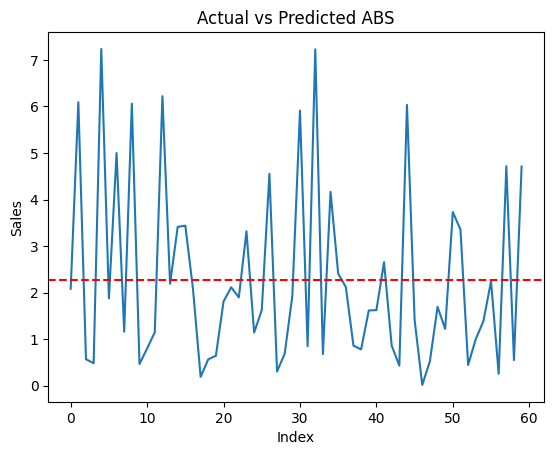

In [ ]:
final_df.reset_index(inplace=True)
import matplotlib.pyplot as plt

plt.plot(final_df.index, final_df.ABS_Error_Actual_vs_Predicted)
plt.title('Actual vs Predicted ABS')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.axhline(final_df['ABS_Error_Actual_vs_Predicted'].mean(), linestyle='dashed', color='red')

In [ ]:
# MEAN absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean ABS arror is: {mae}') # average distance between real and predicted data

Mean ABS arror is: 2.2758809050205113


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE is : {mse}')
print(f'r2 is: {r2}')

MSE is : 8.970991242413614
r2 is: 0.6714477229302764
